<a href="https://colab.research.google.com/github/Nishantthakurrr/Sports-Data-Analysis-Ipl/blob/main/Sports_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
#Reading the CSV DATA

Ball_data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQfp1dxx54z95iyzlFaLUK9J6GeDyxhJCPLNUoCjibcodCJeKX46EnZbcDYm1LM0f62r7o2zRoLi7BN/pub?output=csv")
Matches_data=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSETURtRJ2hWEoA9zJaNhWML9jC74KjE153-uekMTp1mJFWxpSTIWlqbVRrOT2iXosYl-RHjArjIaQ_/pub?output=csv")
Ball_data.head(6)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
5,335982,1,7,4,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [12]:
Matches_data.head(6)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin


In [17]:
# Name of columns in the both of the Dataset

Ball_data.columns, Matches_data.columns

(Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
        'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
        'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
        'batting_team', 'bowling_team'],
       dtype='object'),
 Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
        'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
        'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
       dtype='object'))

In [20]:
# Total number of matches played from 2008 to 2020..
Matches_data.shape[0]
# 816 is the number of matches played

816

In [27]:
# Name of the venues for match

Matches_data["venue"].unique(), len(Matches_data["venue"].unique())

# Total 36 venues

(array(['M Chinnaswamy Stadium',
        'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
        'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
        'Rajiv Gandhi International Stadium, Uppal',
        'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
        'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
        'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
        'OUTsurance Oval', 'Brabourne Stadium',
        'Sardar Patel Stadium, Motera', 'Barabati Stadium',
        'Vidarbha Cricket Association Stadium, Jamtha',
        'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
        'Holkar Cricket Stadium',
        'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
        'Subrata Roy Sahara Stadium',
        'Shaheed Veer Narayan Singh International Stadium',
        'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
        'Sharjah Cricket Stadium', 'Dubai Interna

In [28]:
 #Number of teams

 Matches_data["team1"].unique(), len(Matches_data["team1"].unique())

 # Total number of 15 teams

(array(['Royal Challengers Bangalore', 'Kings XI Punjab',
        'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
        'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
        'Gujarat Lions', 'Rising Pune Supergiants',
        'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object),
 15)

(toss_winner
 Mumbai Indians                 106
 Kolkata Knight Riders           98
 Chennai Super Kings             97
 Royal Challengers Bangalore     87
 Rajasthan Royals                87
 Kings XI Punjab                 85
 Delhi Daredevils                80
 Sunrisers Hyderabad             57
 Deccan Chargers                 43
 Pune Warriors                   20
 Delhi Capitals                  20
 Gujarat Lions                   15
 Kochi Tuskers Kerala             8
 Rising Pune Supergiants          7
 Rising Pune Supergiant           6
 Name: count, dtype: int64,
 <Axes: title={'center': 'Maximum toss winner'}, xlabel='toss_winner'>)

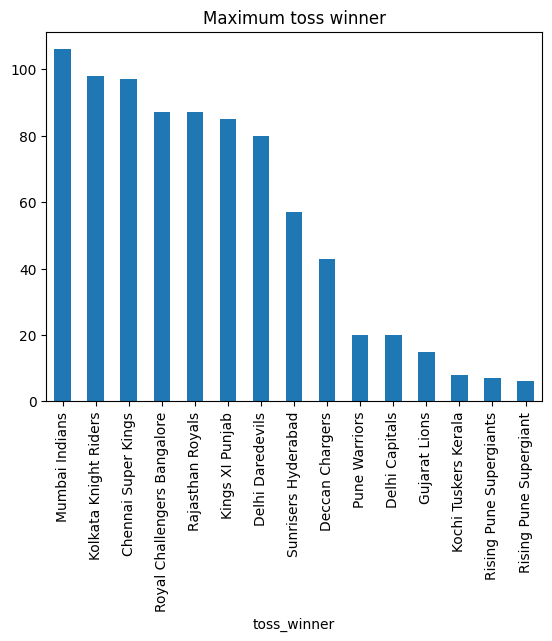

In [33]:
# Maximum toss winner team

Matches_data["toss_winner"].value_counts(),Matches_data["toss_winner"].value_counts().plot(kind="bar",title="Maximum toss winner")

# You can see the bar plot